![title](img/analise.jpg)

# Análise de um *dataset* sobre renda

## Introdução

O *dataset* em questão pode ser encontrado em 
https://www.kaggle.com/wenruliu/adult-income-dataset. 

Começamos importando o arquivo 'adult.csv' com o módulo Pandas do Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
adult = pd.read_csv('adult.csv')

Só para ter um *preview* de quais valores as colunas/características dos nossos dados vão tomar:

In [3]:
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Particionamos o dataset em dois: um para aqueles que recebem menos ou $50 K$, e um para quem recebe mais que $50 K$.

In [5]:
filtro_menos = adult["income"]=="<=50K"
filtro_mais = adult["income"]==">50K"
adult_morethan50 = adult.where(filtro_mais)
adult_lessthan50 = adult.where(filtro_menos)

Os histogramas abaixo sempre estarão na ordem $>50K$, $<=50K$ respectivamente.

## Análise de Dados Numérica

Temos que os dados numéricos do *dataset* são:
* *age*
* *fnlwgt* 
* *educational-num*
* *capital-gain*
* *capital-loss*
* *hours-per-week*

### "Age"

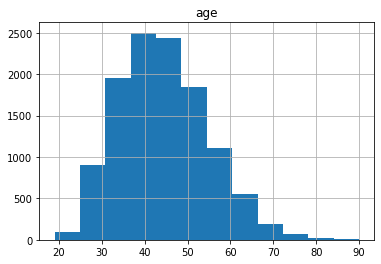

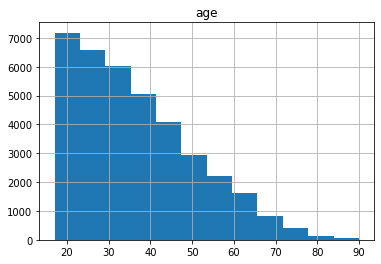

In [6]:
adult_morethan50.hist("age",bins=12)
adult_lessthan50.hist('age',bins=12)
plt.show()

Podemos ver que eles são qualitativamente distintos no tocante à idade: quem recebe mais de $50K$, tende a fazê-lo entre os 30 e 55 anos, enquanto quem recebe menos de $50K$ tende a fazê-lo em idades menores, consoante os aumentos de salário ao longo da vida.

### "fnlwgt"

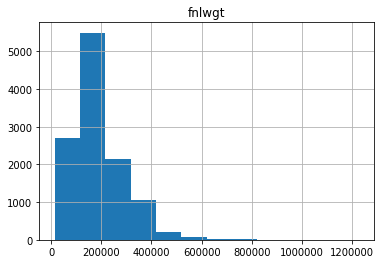

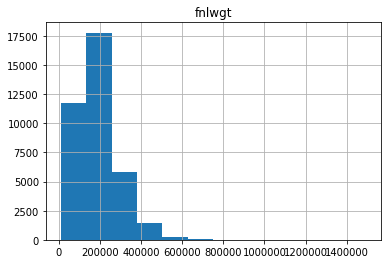

In [7]:
adult_morethan50.hist("fnlwgt",bins=12)
adult_lessthan50.hist('fnlwgt',bins=12)
plt.show()

Não parece haver correlação direta entre "income" e "fnlwgt".

### "educational-num"

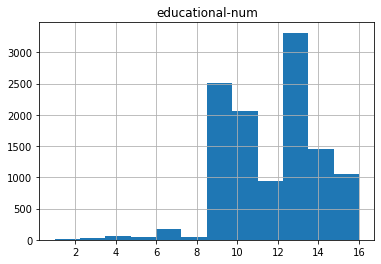

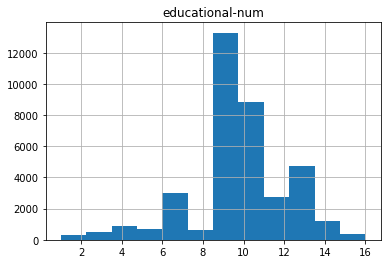

In [8]:
adult_morethan50.hist("educational-num",bins=12)
adult_lessthan50.hist('educational-num',bins=12)
plt.show()

### "capital-gain"

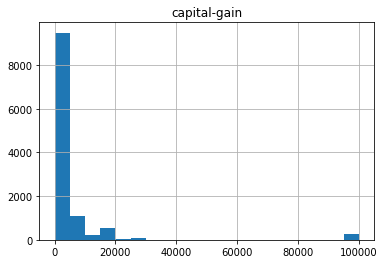

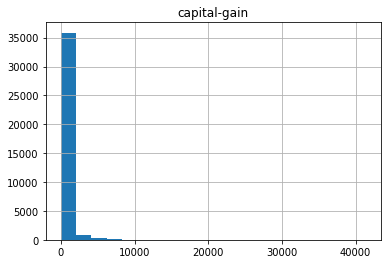

In [9]:
adult_morethan50.hist("capital-gain",bins=20)
adult_lessthan50.hist('capital-gain',bins=20)
plt.show()

Nota-se que há similiridades entre ambos os gráficos, exceto pelo outlier no gráfico dos que ganham mais de $50K$, que tem a ver com a possibilidade de empreitadas com maior risco-recompensa (vide gráficos abaixo de "capital-loss").

### "capital-loss"

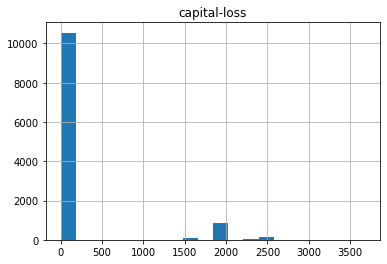

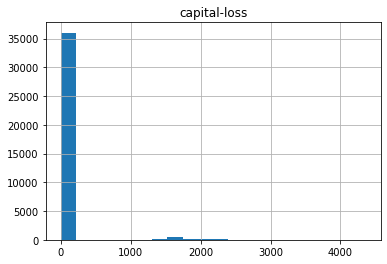

In [10]:
adult_morethan50.hist("capital-loss",bins=20)
adult_lessthan50.hist('capital-loss',bins=20)
plt.show()

Notam-se similaridades em ambos os gráficos, exceto pelos pontos à direita dos "pilares" da esquerda: quem tem mais de $50K$ tem a possibilidade de fazer investimentos mais arriscados (e portanto podem acabar perdendo mais dinheiro), enquanto quem ganha menos de $50K$ busca perder pouco dinheiro.

### "hours-per-week"

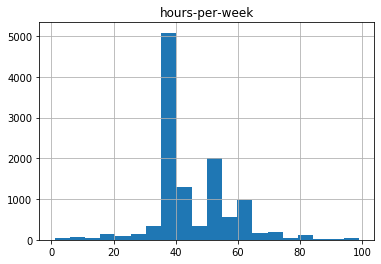

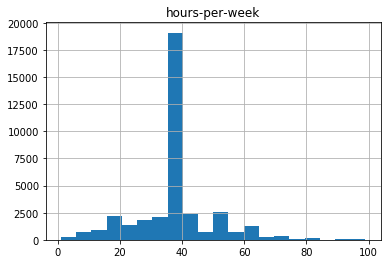

In [11]:
adult_morethan50.hist("hours-per-week",bins=20)
adult_lessthan50.hist('hours-per-week',bins=20)
plt.show()

Os gráficos até têm similaridades (a maioria em ambos trabalha $40$ horas por semana), mas há uma diferença essencial: para quem ganha menos de $50K$, a gigantesca maioria trabalha $40$ horas por semana, enquanto para quem ganha mais de $50K$, há uma variedade maior entre $40$ e $60$ horas por semana; isto é explicado pelos empregos que a maioria de ambos esses casos possuem (executivos para $>50K$ e funcionários para $<=50K$, vide "occupation" abaixo).

# Análise de Dados Categórica

Os dados categóricos são:
* *'workclass'*
* *'education'*
* *'marital-status'*
* *'occupation'*
* *'relationship'*
* *'race'*
* *'gender'*
* *'native-country'*

## "Workclass"

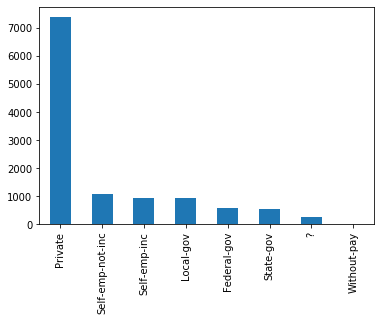

In [12]:
adult_morethan50["workclass"].value_counts().plot(kind='bar')
plt.show()

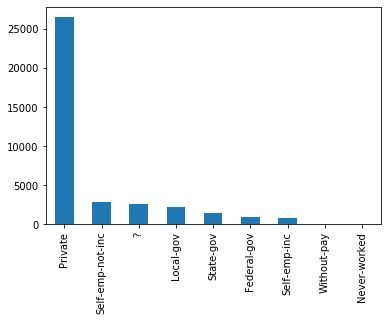

In [13]:
adult_lessthan50["workclass"].value_counts().plot(kind='bar')
plt.show()

Nota-se que a gigantesca maioria, em ambos os gráficos, trabalha no setor privado; no mais, não há muita diferença nas outras respostas, que permanecem a no máximo $1$ ordem de grandeza entre si.

## "Education"

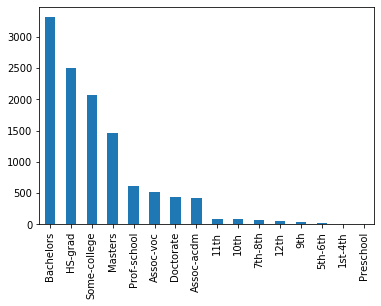

In [14]:
adult_morethan50['education'].value_counts().plot(kind='bar')
plt.show()

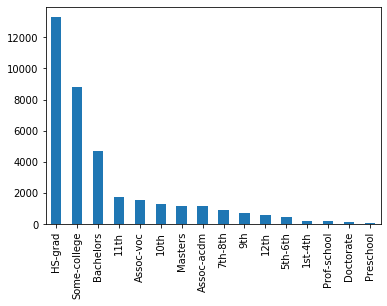

In [15]:
adult_lessthan50['education'].value_counts().plot(kind='bar')

Nota-se que a maioria de quem ganha mais de $50K$ possui somente um bacharelado, com menos indivíduos conforme a formação é maior (mestrado, doutorado). Quanto àqueles que ganham menos de $50K$, nota-se que uma enorme quantidade somente possui Ensino Médio completo, e a mesma tendência de menos indivíduos conforme maior a formação.

## "Marital-status"

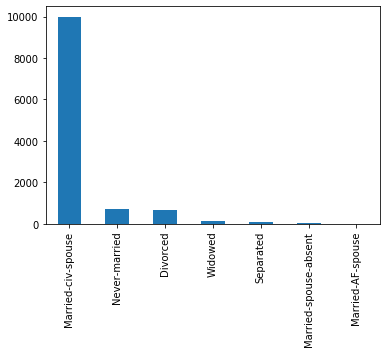

In [16]:
adult_morethan50['marital-status'].value_counts().plot(kind='bar')
plt.show()

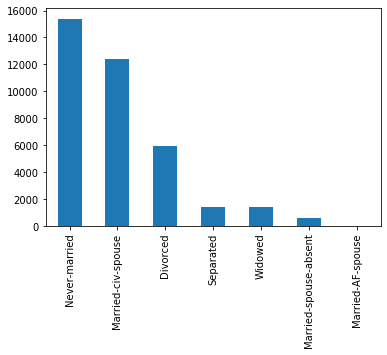

In [17]:
adult_lessthan50['marital-status'].value_counts().plot(kind='bar')
plt.show()

A enorme maioria de quem ganha mais de $50K$ é casado, enquanto quem ganha menos de $50K$, em maioria, nunca se casou; pode ter a ver com a disponibilidade de sustentar uma família, ou mesmo com a imagem de segurança e estabilidade que alguém casado/pai de família pode passar em ambientes empresariais.

## "Occupation"

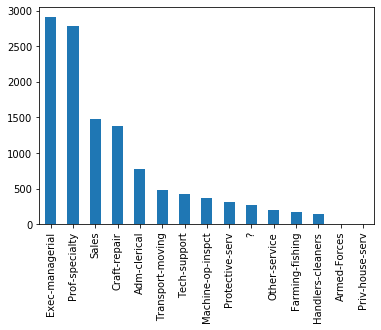

In [18]:
adult_morethan50['occupation'].value_counts().plot(kind='bar')
plt.show()

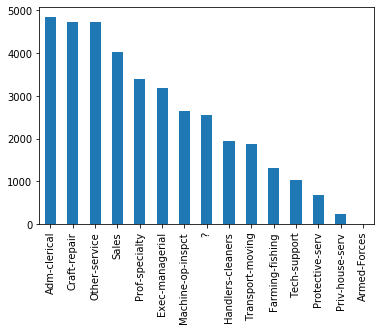

In [19]:
adult_lessthan50['occupation'].value_counts().plot(kind='bar')
plt.show()

A maioria daqueles que ganham mais de $50K$ ou são executivos ou professores especializados, enquanto quem ganha menos de $50K$ variam entre serviços de reparo e serviços administrativos.

## "Relationship"

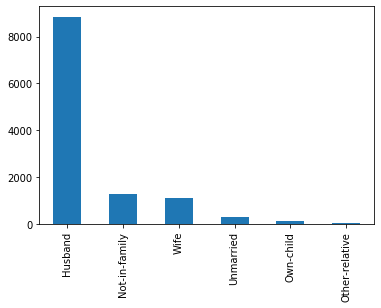

In [20]:
adult_morethan50['relationship'].value_counts().plot(kind='bar')
plt.show()

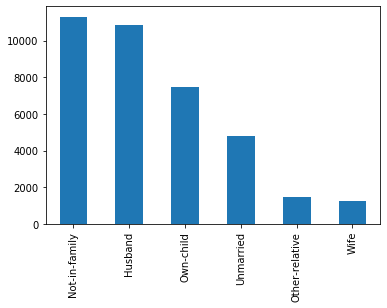

In [21]:
adult_lessthan50['relationship'].value_counts().plot(kind='bar')
plt.show()

É uma feature meio redundante, visto que suas informações podem ser inferidas em "marital-status" (e "gender", por "husband/wife").

## "Race"

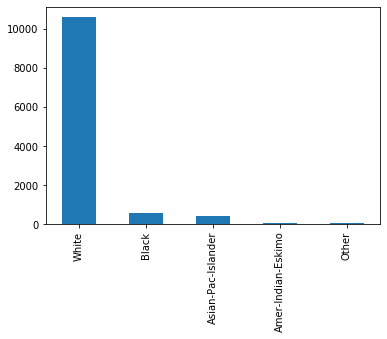

In [22]:
adult_morethan50["race"].value_counts().plot(kind='bar')
plt.show()

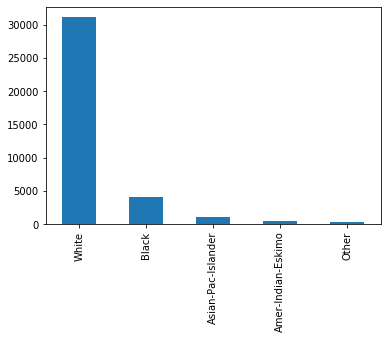

In [23]:
adult_lessthan50['race'].value_counts().plot(kind='bar')
plt.show()

Pela análise de ambos os gráficos, a grande maioria dos entrevistados é branca, o que pôde enviesar o resultado final.

## "Gender"

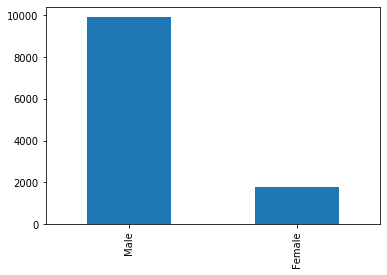

In [24]:
adult_morethan50['gender'].value_counts().plot(kind='bar')
plt.show()

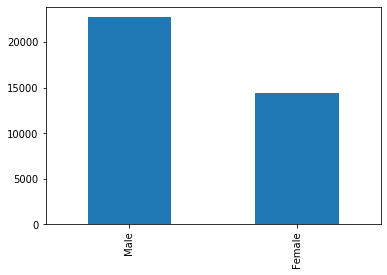

In [25]:
adult_lessthan50['gender'].value_counts().plot(kind='bar')
plt.show()

Representa o *gap* de salários entre homens e mulheres, e infelizmente não devido à diferença da quantidade de entrevistados homens e mulheres.

## "Native-country"

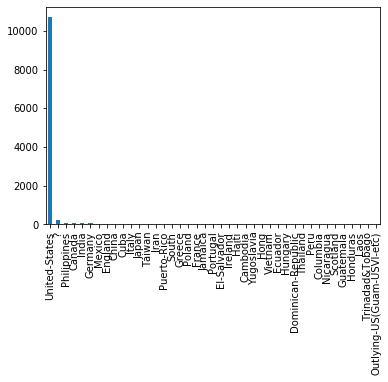

In [26]:
adult_morethan50['native-country'].value_counts().plot(kind='bar')
plt.show()

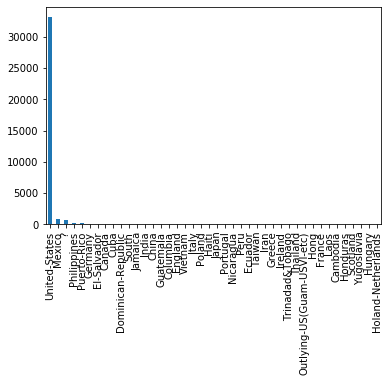

In [27]:
adult_lessthan50['native-country'].value_counts().plot(kind='bar')
plt.show()

Como em "race", essa *feature* não afirma tanta coisa assim, visto que a esmagadora maioria dos entrevistados é dos Estados Unidos.